In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

In [2]:
df=pd.read_csv('imdb.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.dropna(inplace=True)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
texts = df['review'].astype(str).tolist()
labels = df['sentiment'].tolist()

In [5]:
t=Tokenizer(num_words=10000, oov_token='<OOV>')
t.fit_on_texts(texts)
sequences=t.texts_to_sequences(texts)

In [6]:
pad=pad_sequences(sequences,maxlen=256)

In [7]:
import numpy as np

X = np.array(pad)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=32,),#input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [15]:
 history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 2.1356e-07 - val_accuracy: 0.8585 - val_loss: 1.7774
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 9.4925e-08 - val_accuracy: 0.8585 - val_loss: 1.8672
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 5.2755e-08 - val_accuracy: 0.8590 - val_loss: 1.9424
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 2.7760e-08 - val_accuracy: 0.8587 - val_loss: 2.0102
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 1.5976e-08 - val_accuracy: 0.8593 - val_loss: 2.0708
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 1.0418e-08 - val_accuracy: 0.8593 - val_loss: 2.1266
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 6.6355e-09 - val_accuracy: 0.8591 - val_loss: 2.1773
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accura

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {accuracy:.2f}")
print(f" Test Loss: {loss:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.8555 - loss: 1.9542

 Test Accuracy: 0.86
 Test Loss: 1.93


In [12]:
new_review = ["This movie was fantastic!"]
seq = t.texts_to_sequences(new_review)
padded_seq = pad_sequences(seq, maxlen=256)
prediction = model.predict(padded_seq)[0][0]

if prediction >= 0.5:
    print(f" Positive review (Confidence: {prediction:.2f})")
else:
    print(f" Negative review (Confidence: {1 - prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
 Positive review (Confidence: 1.00)


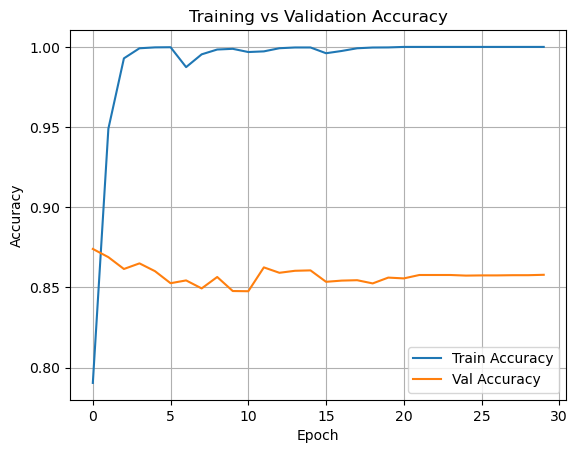

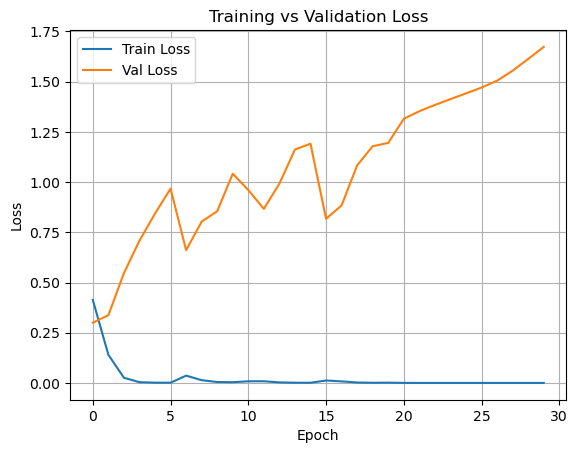

In [13]:
import matplotlib.pyplot as plt

# Accuracy & Loss in one go
metrics = ['accuracy', 'loss']
titles = ['Accuracy', 'Loss']

for metric, title in zip(metrics, titles):
    plt.plot(history.history[metric], label=f'Train {title}')
    plt.plot(history.history[f'val_{metric}'], label=f'Val {title}')
    plt.title(f'Training vs Validation {title}')
    plt.xlabel('Epoch')
    plt.ylabel(title)
    plt.legend()
    plt.grid(True)
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step


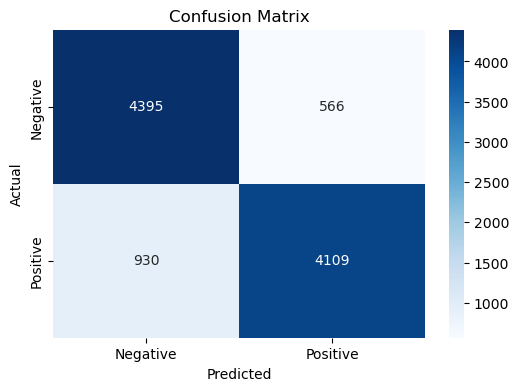

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()